In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [67]:
!pip install boruta
!pip install tqdm
!pip install ipywidgets --upgrade
!pip install jupyter --upgrade

Requirement already up-to-date: ipywidgets in /home/bruce/pythonproyects/saturdays-ai-env/lib/python3.6/site-packages (7.5.1)


     |████████████████████████████████| 117 kB 889 kB/s eta 0:00:01
     |████████████████████████████████| 54 kB 1.0 MB/s eta 0:00:01


In [56]:
################# SATURDAYSAI #################
### Importación de las librerías necesarias ###
###############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, SparsePCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

# rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["1","2"]

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

#### Selección de variables con Boruta ####
import boruta 
from sklearn.ensemble import RandomForestClassifier

# Clusterings
from sklearn.cluster import KMeans

# Elbow method en clustering
from tqdm.notebook import tqdm

%matplotlib inline

# Carga de datos

In [2]:
### Importación de la Base de datos ###
# file = "/content/drive/My Drive/Proyecto SaturdaysAI - Prediccion de ludopatia/EstudioPrevalencia2015.xlsx"
file = './EstudioPrevalencia2015.xlsx'
xl = pd.ExcelFile(file)

In [3]:
print(xl.sheet_names)

['Hoja1', 'BBDD fichero total', 'títulos y códigos']


In [4]:
df=xl.parse('BBDD fichero total')

In [5]:
# for column in df.columns:
#     print(str(column))
df.head(10)

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
0,1006,1,9,4,4,32,1,1,1.0,2.0,...,4,2,2,NaN,1,3,1.128607,1.128607,NaN,NaN
1,1007,1,3,5,6,52,1,1,1.0,2.0,...,5,1,1,NaN,1,1,1.100234,1.100234,NaN,NaN
2,1008,1,4,5,8,67,2,1,1.0,2.0,...,100,4,5,NaN,1,4,1.196041,1.196041,NaN,NaN
3,1009,1,5,5,7,60,2,1,1.0,2.0,...,100,2,3,NaN,1,3,1.062141,1.062141,NaN,NaN
4,1010,1,5,5,6,51,2,1,1.0,2.0,...,5,2,3,NaN,1,3,1.062141,1.062141,NaN,1.0
5,1011,1,5,5,3,18,1,1,1.0,2.0,...,2,99,1,NaN,1,3,1.062141,1.062141,NaN,NaN
6,1012,1,5,5,4,27,2,1,1.0,1.0,...,4,1,1,NaN,1,3,0.720738,0.753777,NaN,NaN
7,1013,1,5,5,4,34,2,1,1.0,2.0,...,100,2,2,NaN,1,2,1.062141,1.062141,NaN,NaN
8,1014,1,5,5,7,62,1,1,2.0,NaN,...,100,2,3,NaN,1,2,1.062141,1.062141,NaN,NaN
9,1015,1,9,1,4,34,2,2,NaN,NaN,...,6,2,2,NaN,1,2,1.128607,1.128607,NaN,1.0


In [6]:
df.describe()

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
count,6816.000000,6816.0,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,5202.000000,4669.000000,...,6816.000000,6816.000000,6816.000000,149.000000,6816.000000,6816.000000,6816.000000,6816.000000,660.0,1307.0
mean,4577.223738,1.0,8.456719,3.571156,5.777142,47.907864,1.516432,1.236796,1.102461,1.911544,...,39.057072,2.367811,2.843603,5.993289,1.098005,2.488116,1.050457,1.046409,1.0,1.0
std,2076.015852,0.0,4.826821,1.763138,1.626472,17.571003,0.499767,0.425147,0.303282,0.283987,...,46.042025,6.428943,6.887837,1.646030,2.087890,7.864340,0.181920,0.182712,0.0,0.0
min,1006.000000,1.0,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.175572,0.131613,1.0,1.0
25%,2777.750000,1.0,5.000000,2.000000,4.000000,34.000000,1.000000,1.000000,1.000000,2.000000,...,4.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.082998,1.082998,1.0,1.0
50%,4565.500000,1.0,9.000000,4.000000,6.000000,46.000000,2.000000,1.000000,1.000000,2.000000,...,5.000000,2.000000,2.000000,5.000000,1.000000,2.000000,1.107651,1.107651,1.0,1.0
75%,6359.250000,1.0,13.000000,5.000000,7.000000,62.000000,2.000000,1.000000,1.000000,2.000000,...,100.000000,2.000000,3.000000,7.000000,1.000000,3.000000,1.115778,1.115778,1.0,1.0
max,8240.000000,1.0,19.000000,6.000000,8.000000,95.000000,2.000000,2.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,16.000000,100.000000,100.000000,1.196041,1.196041,1.0,1.0


# Limpieza de los datos

In [7]:
# Declaración de funciones para limpiar el Dataframe

def change_99_100(x):
    if (type(x) == int or type(x) == float) and x >= 99.0:
      return None
    else :
      return x

def change_column_P23(x):
    if (type(x) == int or type(x) == float) and x >= 2.0:
      return 2
    else :
      return 1

def cleanDataset(df):
  print("Tamaño del dataframe antes de limpieza ", df.shape)

  new_df = df[df['P23'] <= 3]
  print("Eliminadas filas que no han contestado a la variable objetivo ", new_df.shape )

  new_df = new_df.apply(change_99_100)
  print("Eliminados los valores de 99 o 100", new_df.shape)

  new_df['P23'] = new_df['P23'].apply(change_column_P23)
  print("Unificados Valores de P23 2 y 3 en solo 2", new_df.shape)

  new_df = new_df.dropna(axis=1, how='any')
  print("Eliminadas todas las columnas con al menos un valor nulo", new_df.shape)

  new_df = new_df.drop(['numero', 'modalidad'],1)
  print("Eliminadas columnas que no aportan valor ", new_df.shape)

  new_df = new_df[['P0R1','P0B','POB1','P0C','P3','P4','P5','P6','P7','P8','P9','P11',
                   'P13','P15A','P16A','P18A','P18B','P18C','P20','P21','P22','P24','P26',
                   'P28','P29','P30','P31','P32','P33','P34','P35','P38SP1','P38SP2',
                   'P38SP3','P38SP4','P38SP5','P38SP6','P38SP7','P38SP8','P38SP9',
                   'P39','P41','P43','P46','DB0','DB1','DB3','DB4','DB5','DB6','DB7','DB8', 'P23'
                  ]]
  print("Después del análisis del investigador dejamos las columnas más interesantes ", new_df.shape)

  return new_df

In [8]:
df_cleaned = cleanDataset(df)
# new_df.describe()
print(type(df_cleaned))
# Variables del experto ya eliminadas previamente
# df[['P50', 'DB2', 'P47', 'P38SP10', 'POF3']].describe()

Tamaño del dataframe antes de limpieza  (6816, 240)
Eliminadas filas que no han contestado a la variable objetivo  (5159, 240)
Eliminados los valores de 99 o 100 (5159, 240)
Unificados Valores de P23 2 y 3 en solo 2 (5159, 240)
Eliminadas todas las columnas con al menos un valor nulo (5159, 127)
Eliminadas columnas que no aportan valor  (5159, 125)
Después del análisis del investigador dejamos las columnas más interesantes  (5159, 53)
<class 'pandas.core.frame.DataFrame'>


# Análisis estadístico

In [9]:
df_cleaned.columns

Index(['P0R1', 'P0B', 'POB1', 'P0C', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P11', 'P13', 'P15A', 'P16A', 'P18A', 'P18B', 'P18C', 'P20', 'P21',
       'P22', 'P24', 'P26', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34',
       'P35', 'P38SP1', 'P38SP2', 'P38SP3', 'P38SP4', 'P38SP5', 'P38SP6',
       'P38SP7', 'P38SP8', 'P38SP9', 'P39', 'P41', 'P43', 'P46', 'DB0', 'DB1',
       'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DB8', 'P23'],
      dtype='object')

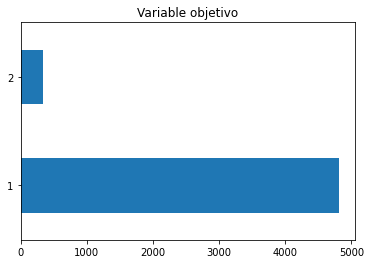

In [10]:
### Variable Objetivo ###
plot= df_cleaned['P23'].value_counts().plot(kind='barh', title="Variable objetivo") 

In [11]:
### Tabla Variable objetivo - Comunidad autónoma ###
pd.crosstab(df_cleaned['P23'], df_cleaned['P0R1'], margins=True)


P0R1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,All
P23,,,,,,,,,,,,,,,,,,,,
1,1023,150,146,129,254,63,215,173,509,563,83,315,633,153,72,225,44,37,33,4820
2,33,7,5,3,19,1,33,14,36,31,5,20,77,6,4,24,16,1,4,339
All,1056,157,151,132,273,64,248,187,545,594,88,335,710,159,76,249,60,38,37,5159


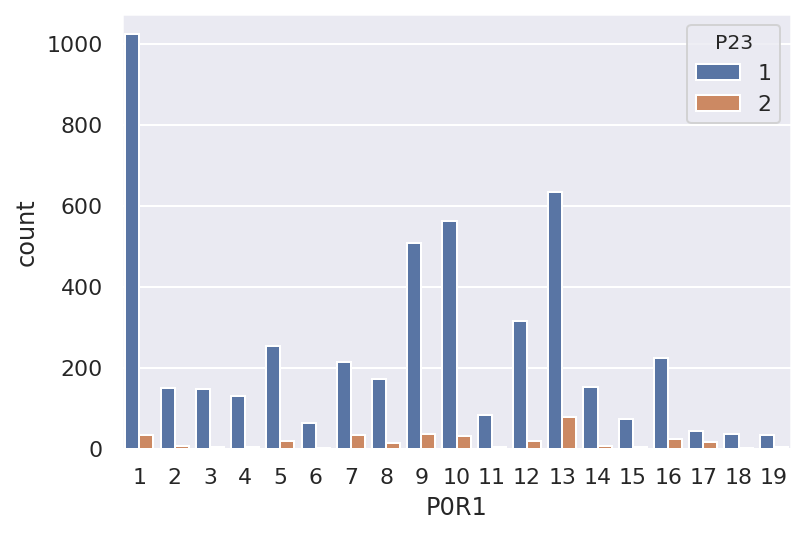

In [12]:
sns.set()
%config InlineBackend.figure_format='retina'
sns.countplot(x='P0R1', hue='P23', data=df_cleaned);

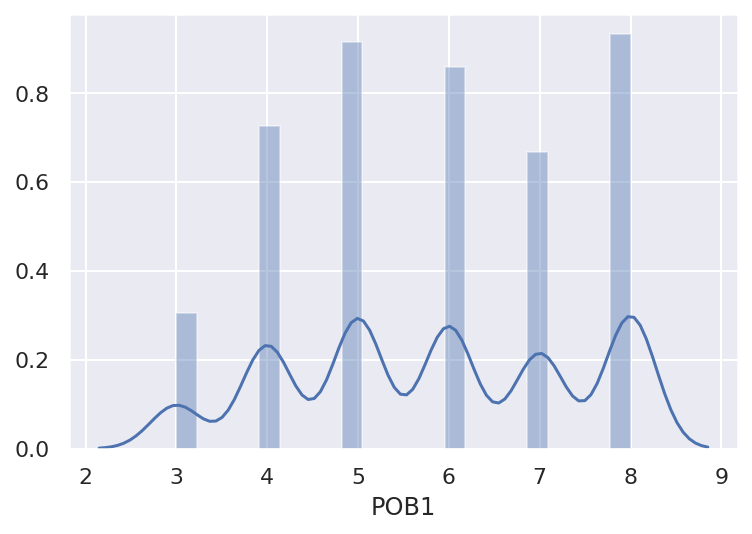

In [13]:
### Histograma de la edad ###
sns.distplot(df_cleaned['POB1'])

(array([ 357.,    0.,  850.,    0.,    0., 1071.,    0., 1006.,  783.,
        1092.]),
 array([1.09861229, 1.19669521, 1.29477814, 1.39286106, 1.49094399,
        1.58902692, 1.68710984, 1.78519277, 1.88327569, 1.98135862,
        2.07944154]),
 <a list of 10 Patch objects>)

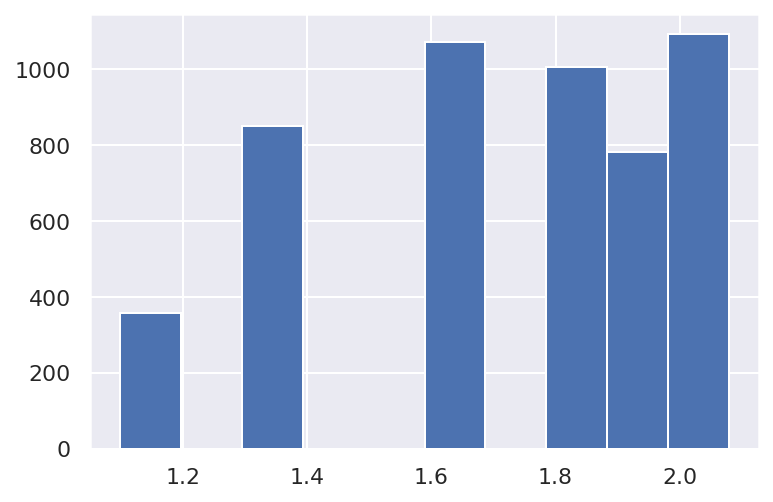

In [14]:
### Histograma ###
log_edad = np.log(df_cleaned['POB1'])
plt.hist(log_edad)

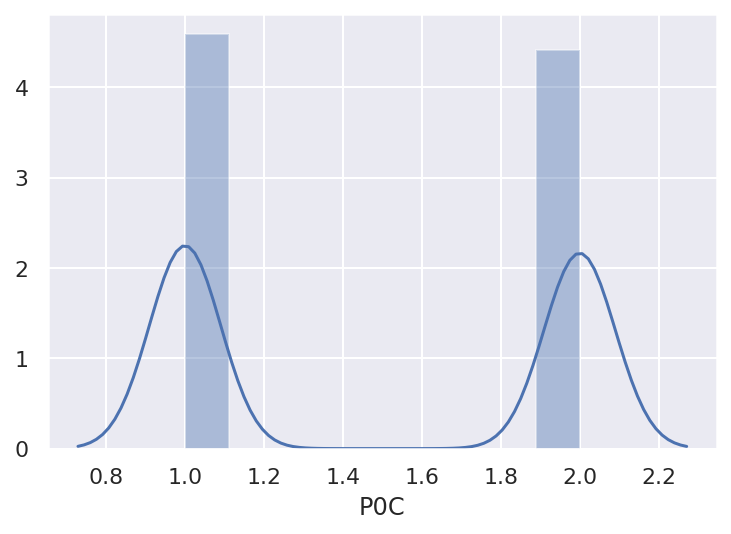

In [15]:
### Histograma del sexo ###
sns.distplot(df_cleaned['P0C'])

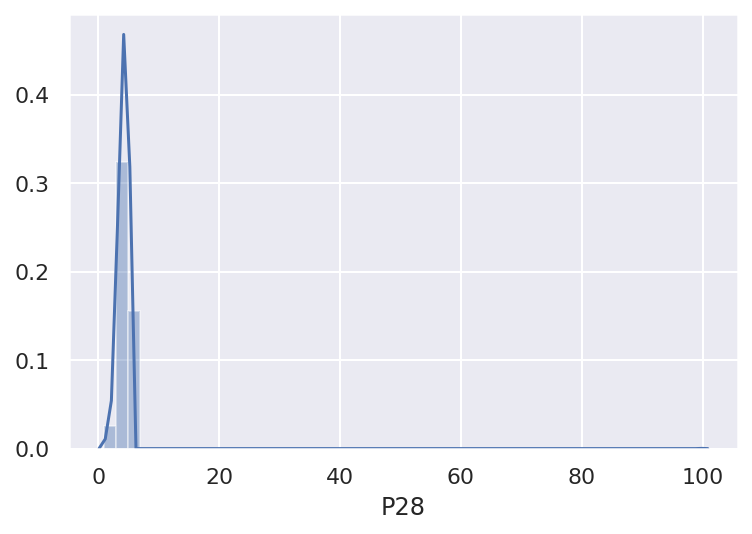

In [16]:
### Histograma Estado de Salud ###
sns.distplot(df_cleaned['P28'])

In [17]:
# print(*df_cleaned.columns.to_list(), sep=', ')
# print(df_cleaned.columns.to_list())

In [18]:
# df_cleaned= new_df[Datos]
df_cleaned.head()

,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
0,9,4,4,1,1.0,1.0,1.0,5.0,2.0,1.0,...,7,4,2,1,4,2,2,1,3,1
1,3,5,6,1,1.0,1.0,2.0,5.0,1.0,2.0,...,8,3,4,5,5,1,1,1,1,1
2,4,5,8,2,1.0,1.0,2.0,5.0,2.0,1.0,...,9,2,4,100,100,4,5,1,4,1
3,5,5,7,2,1.0,1.0,1.0,5.0,2.0,2.0,...,11,3,1,100,100,2,3,1,3,1
4,5,5,6,2,1.0,1.0,1.0,5.0,2.0,1.0,...,9,3,1,3,5,2,3,1,3,1


In [19]:
# df_cleaned.shape

In [20]:
# df_cleaned.dtypes

In [21]:
# df_cleaned.isnull().sum()

In [22]:
df_cleaned.describe()

,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
count,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,...,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000
mean,8.170576,3.560380,5.830393,1.490599,2.237643,1.881179,2.444854,5.043807,2.396395,1.900950,...,8.680364,2.895910,2.659624,25.786393,33.153324,2.328552,2.825160,1.041481,2.353557,1.065710
std,5.048003,1.758982,1.568310,0.499960,9.893154,7.223864,9.208899,4.409402,7.541617,6.417858,...,3.938258,2.830794,6.139870,41.104046,43.922112,5.984180,6.473831,0.199419,7.049362,0.247799
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,...,8.000000,2.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,1.000000,...,9.000000,3.000000,1.000000,4.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,13.000000,5.000000,7.000000,2.000000,1.000000,1.000000,2.000000,5.000000,2.000000,2.000000,...,10.000000,3.000000,4.000000,5.000000,99.000000,2.000000,3.000000,1.000000,3.000000,1.000000
max,19.000000,6.000000,8.000000,2.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2.000000,100.000000,2.000000


In [23]:
### Relaciones entre las features ###
correlation = df_cleaned.corr()
display(correlation)
plt.figure(figsize=(14, 12))

,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
P0R1,1.000000,0.081504,0.007794,-0.028402,-0.070879,0.003193,0.012897,0.011945,0.001595,0.023298,...,-0.022115,0.017116,-0.006708,0.103939,0.120185,0.010942,-0.019756,0.061147,0.000958,0.088680
P0B,0.081504,1.000000,0.019631,0.000150,-0.035261,0.058765,0.027551,-0.008665,-0.004954,0.053880,...,-0.021996,0.039128,0.012656,0.029350,0.053335,-0.003165,-0.003295,0.012203,-0.017263,0.002683
POB1,0.007794,0.019631,1.000000,0.074493,-0.002400,0.017062,0.009091,0.021512,-0.019607,0.017978,...,-0.048079,-0.123370,0.128538,0.065753,-0.023110,0.072746,0.130784,-0.086602,-0.044185,-0.005240
P0C,-0.028402,0.000150,0.074493,1.000000,-0.033179,-0.012790,-0.032968,0.018039,-0.020941,-0.011015,...,-0.000296,-0.020212,0.046831,-0.024334,-0.019600,0.022125,0.003685,-0.003866,-0.022105,-0.044307
P3,-0.070879,-0.035261,-0.002400,-0.033179,1.000000,0.125164,0.197892,-0.010421,0.166846,0.082433,...,0.026900,-0.011612,0.024638,0.026291,0.038950,0.024676,-0.006613,0.007777,-0.008563,0.020043
P4,0.003193,0.058765,0.017062,-0.012790,0.125164,1.000000,0.190338,0.051284,0.128157,0.448863,...,0.001432,0.000684,0.041798,-0.009477,-0.001304,-0.000187,0.000389,0.009882,-0.006481,0.018984
P5,0.012897,0.027551,0.009091,-0.032968,0.197892,0.190338,1.000000,0.038600,0.176246,0.246549,...,-0.011105,-0.005445,0.030662,0.052972,0.061231,-0.006297,-0.003466,0.013070,-0.007408,0.014799
P6,0.011945,-0.008665,0.021512,0.018039,-0.010421,0.051284,0.038600,1.000000,0.046888,0.121709,...,-0.010135,-0.016658,0.001962,0.003542,0.031103,0.067785,0.000594,0.031446,0.050815,0.009076
P7,0.001595,-0.004954,-0.019607,-0.020941,0.166846,0.128157,0.176246,0.046888,1.000000,0.149498,...,0.001865,0.090139,0.069985,0.026939,0.029582,0.072759,-0.009210,0.007241,0.065845,0.003903
P8,0.023298,0.053880,0.017978,-0.011015,0.082433,0.448863,0.246549,0.121709,0.149498,1.000000,...,-0.004168,-0.001731,0.050062,0.015947,0.026065,-0.001101,0.004133,0.000181,-0.006301,0.049077


<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
P0R1,1.000000,0.081504,0.007794,-0.028402,-0.070879,0.003193,0.012897,0.011945,0.001595,0.023298,...,-0.022115,0.017116,-0.006708,0.103939,0.120185,0.010942,-0.019756,0.061147,0.000958,0.088680
P0B,0.081504,1.000000,0.019631,0.000150,-0.035261,0.058765,0.027551,-0.008665,-0.004954,0.053880,...,-0.021996,0.039128,0.012656,0.029350,0.053335,-0.003165,-0.003295,0.012203,-0.017263,0.002683
POB1,0.007794,0.019631,1.000000,0.074493,-0.002400,0.017062,0.009091,0.021512,-0.019607,0.017978,...,-0.048079,-0.123370,0.128538,0.065753,-0.023110,0.072746,0.130784,-0.086602,-0.044185,-0.005240
P0C,-0.028402,0.000150,0.074493,1.000000,-0.033179,-0.012790,-0.032968,0.018039,-0.020941,-0.011015,...,-0.000296,-0.020212,0.046831,-0.024334,-0.019600,0.022125,0.003685,-0.003866,-0.022105,-0.044307
P3,-0.070879,-0.035261,-0.002400,-0.033179,1.000000,0.125164,0.197892,-0.010421,0.166846,0.082433,...,0.026900,-0.011612,0.024638,0.026291,0.038950,0.024676,-0.006613,0.007777,-0.008563,0.020043
P4,0.003193,0.058765,0.017062,-0.012790,0.125164,1.000000,0.190338,0.051284,0.128157,0.448863,...,0.001432,0.000684,0.041798,-0.009477,-0.001304,-0.000187,0.000389,0.009882,-0.006481,0.018984
P5,0.012897,0.027551,0.009091,-0.032968,0.197892,0.190338,1.000000,0.038600,0.176246,0.246549,...,-0.011105,-0.005445,0.030662,0.052972,0.061231,-0.006297,-0.003466,0.013070,-0.007408,0.014799
P6,0.011945,-0.008665,0.021512,0.018039,-0.010421,0.051284,0.038600,1.000000,0.046888,0.121709,...,-0.010135,-0.016658,0.001962,0.003542,0.031103,0.067785,0.000594,0.031446,0.050815,0.009076
P7,0.001595,-0.004954,-0.019607,-0.020941,0.166846,0.128157,0.176246,0.046888,1.000000,0.149498,...,0.001865,0.090139,0.069985,0.026939,0.029582,0.072759,-0.009210,0.007241,0.065845,0.003903
P8,0.023298,0.053880,0.017978,-0.011015,0.082433,0.448863,0.246549,0.121709,0.149498,1.000000,...,-0.004168,-0.001731,0.050062,0.015947,0.026065,-0.001101,0.004133,0.000181,-0.006301,0.049077


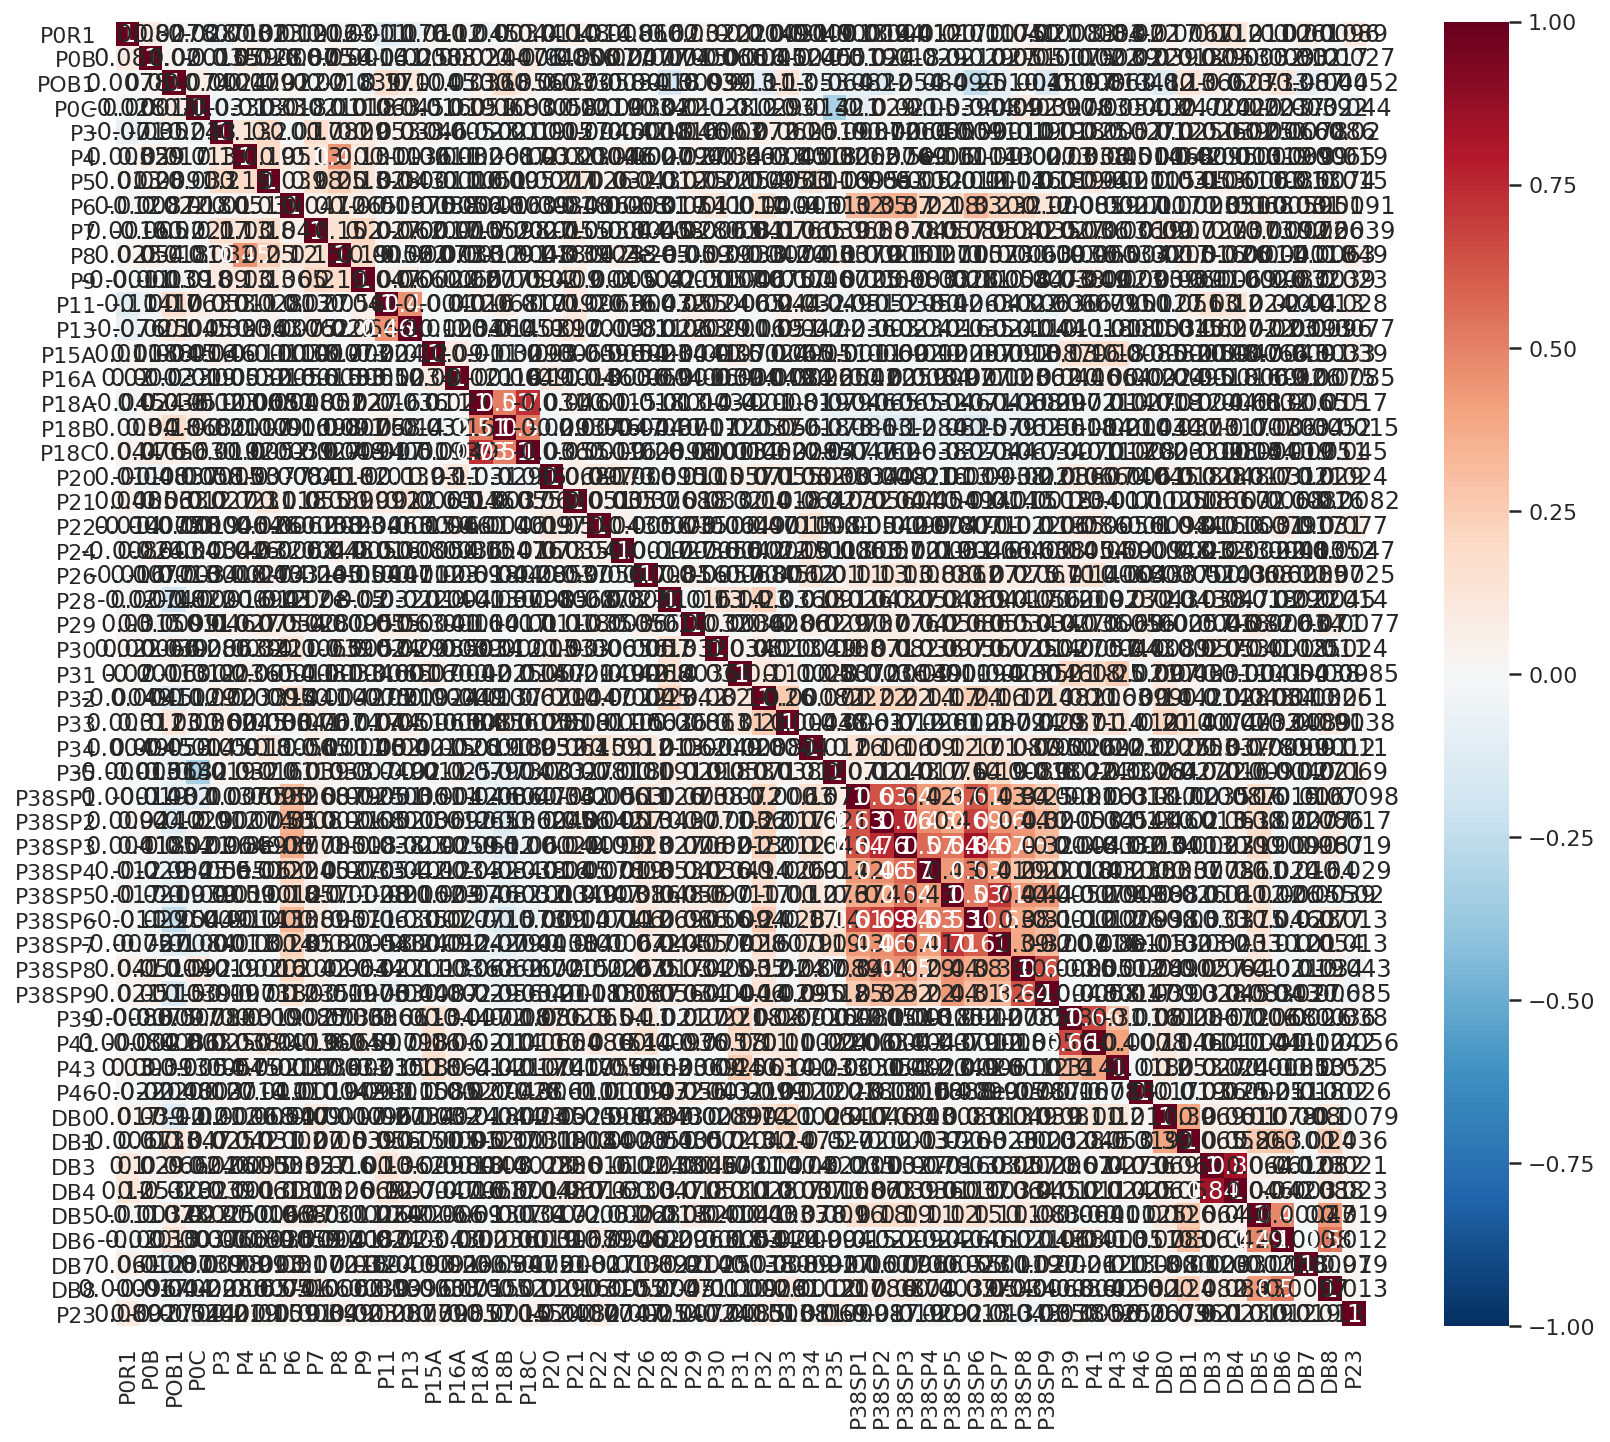

In [24]:
### Relaciones entre las features ###
correlation = df_cleaned.corr()
display(correlation)
plt.figure(figsize=(14, 12))
import seaborn as sns
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [25]:
print('Antes de eliminar las variables correladas ', df_cleaned.shape)
df_without_correlations = df_cleaned.drop(columns=["P4","P5","P6","P11","P16A","P18B","P18C","P32","P38SP3","P38SP6","DB3","DB4","DB6"])
print('Despues de eliminar las variables correladas ', df_without_correlations.shape)

Antes de eliminar las variables correladas  (5159, 53)
Despues de eliminar las variables correladas  (5159, 40)


In [26]:
df_without_correlations["P23"].value_counts()

1    4820
2     339
Name: P23, dtype: int64

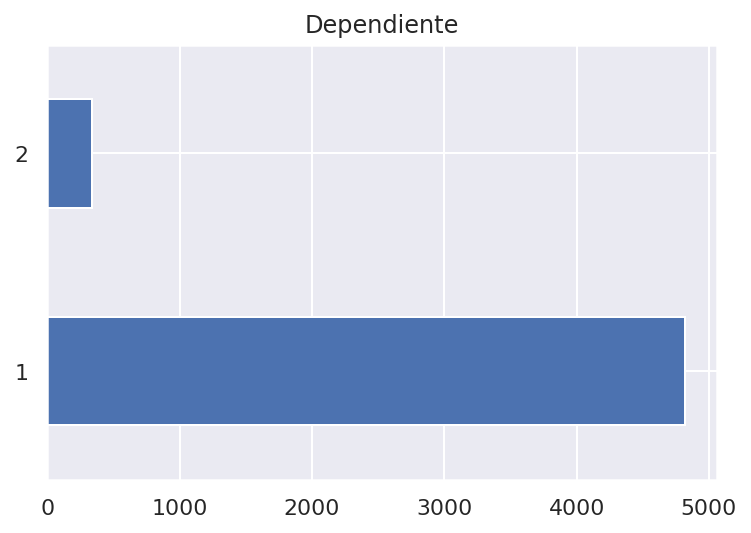

In [27]:
plot= df_without_correlations["P23"].value_counts().plot(kind='barh', title="Dependiente") 

# Análisis de componentes principales (PCA)

### Nota:
Con el análisis de componentes principales se obtienen tantos componentes como dimensiones (número de variables) tengan los datos de entrada. Los componentes se ordenan de mayor a menor en función de la cantidad de varianza explicada por cada uno, y estan formados por una combinación específica de las variables originales.

Junto al PCA, también añado un SparsePCA, en la documentación de scikit-learn podemos entender por qué esto podría ser interesante para la selección de variables:

> "Principal component analysis (PCA) has the disadvantage that the components extracted by this method have exclusively dense expressions, i.e. they have non-zero coefficients when expressed as linear combinations of the original variables. This can make interpretation difficult. (...)
> Sparse principal components yields a more parsimonious, interpretable representation, clearly emphasizing which of the original features contribute to the differences between samples."

[Referencia](https://scikit-learn.org/stable/modules/decomposition.html#sparse-principal-components-analysis-sparsepca-and-minibatchsparsepca)

In [28]:
RANDOM_STATE = 17  # Semilla para generar número aleatorio
scaler = StandardScaler()  # Estandarizamos los datos

# Seleccionamos el mínimo número de componentes para cubrir el 50% de la varianza:
pca = PCA(n_components=0.5, random_state=RANDOM_STATE)
# El parámetro alfa controla la «escasez» de componentes:
spar_pca = SparsePCA(alpha=0.2, random_state=RANDOM_STATE)

scaled_data = scaler.fit_transform(df_without_correlations.drop('P23', axis=1))
pca.fit(scaled_data)
spar_pca.fit(scaled_data)

num_components = pca.n_components_

print("Número total de componentes que explican el 50 pct de la varianza: %d" % num_components)
print("Porcentaje de varianza explicado por cada uno de los %d primeros componentes: \n" % num_components + str(pca.explained_variance_ratio_*100))

Número total de componentes que explican el 50 pct de la varianza: 13
Porcentaje de varianza explicado por cada uno de los 13 primeros componentes: 
[9.57781522 5.95071388 4.65916242 3.89898284 3.79133758 3.42695036
 3.20665866 3.08461727 3.07117756 2.94762942 2.79554499 2.73843585
 2.67731787]


        pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  1.092126 -0.276732 -0.302652  0.226302  0.557933 -0.225795  0.429028   
1 -0.147205  0.202944  0.551919  0.394666 -1.594985  0.978674 -0.997433   
2 -0.708227  0.315577  1.409992 -1.253440 -2.220214  1.013404 -0.643772   
3 -1.059845 -0.028962  0.255531 -0.777038 -0.176551 -0.680967  0.281766   
4  0.326394 -0.417950 -0.073560 -0.706610 -0.039699 -0.587627  0.075359   

        pc8       pc9      pc10      pc11      pc12      pc13  
0 -0.109771 -0.539468 -0.104974 -0.661627  0.174312  0.423598  
1  1.029196  1.005693  0.001205  1.338827 -0.539597  1.435847  
2  0.430157  1.976864  0.864224  0.560500 -0.570094  1.617896  
3 -0.268890  0.507800  0.094088  0.256983  0.638003 -0.257497  
4 -0.101858 -0.036599 -0.292477  0.541239 -0.127828 -0.519172  


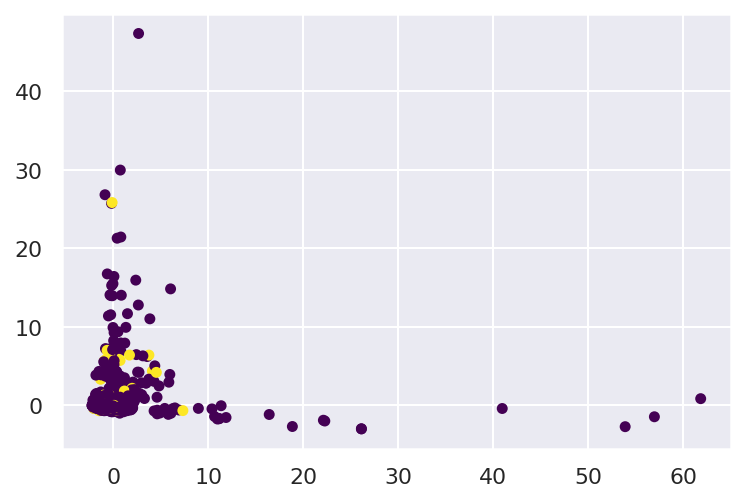

In [29]:
# Generamos un data frame con los Componentes Principales obtenidos
columns = ["pc%d" % i for i in range(1, pca.n_components_+1)]
pca_df = pd.DataFrame(data = pca.transform(scaled_data), columns = columns)
print(pca_df.head())

# Visualizamos la proyección de la variable objetivo en los dos primeros componentes principales
plt.scatter(pca_df['pc1'], pca_df['pc2'], c=df_without_correlations['P23'].to_numpy(), s=20, cmap='viridis')

In [30]:
pca_components = pca.components_
spar_pca_components = spar_pca.components_

for i in range(num_components):
    print("\nContribución de las variables para los PCA y SparsePCA:")
    print("PCA"+str(i)+"\n"+str(pca_components[i])+"\n"+str(spar_pca_components[i]))
#     print("Norma del componente: %f" % np.linalg.norm(pca_components[i]))


Contribución de las variables para los PCA y SparsePCA:
PCA0
[ 0.01497119  0.0033732  -0.09260038 -0.02963501  0.00197141  0.06445607
  0.01003466  0.00823281 -0.01967416 -0.00455102 -0.05006863 -0.00251907
  0.02305315  0.00449978  0.00319141  0.09464963  0.05106363  0.06190581
  0.05880188  0.00923476 -0.0102125   0.12376473  0.06670037  0.36096807
  0.38943809  0.32798524  0.3923208   0.38879039  0.35153612  0.31593135
  0.00509401  0.00893042  0.00265588  0.01575071  0.04475476  0.0121826
  0.13616135  0.00154007  0.06809309]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]

Contribución de las variables para los PCA y SparsePCA:
PCA1
[ 0.01394175  0.00355728  0.03292817 -0.00701708  0.06164911  0.09175088
  0.03424385  0.06085734  0.02790247  0.17915546 -0.02614746  0.138168
  0.04967203  0.0794878   0.06386651  0.09062655 -0.00308176  0.04058731
  0.01573088  0.28165   

In [31]:
print("Indices distintos de 0: " + str(np.nonzero(spar_pca_components)[1][:num_components+2]))
features_pca = df_without_correlations.columns[np.nonzero(spar_pca_components)[1][:num_components+2]].tolist()
print("\nLista de variables seleccionadas con la configuración actual:\n" + str(features_pca))
df_pca_vars = df_without_correlations[features_pca]
df_pca_vars.head()

Indices distintos de 0: [23 30 35 22  5 13 34  2 13 34 19 33  0 10 29]

Lista de variables seleccionadas con la configuración actual:
['P38SP1', 'P39', 'DB1', 'P35', 'P7', 'P22', 'DB0', 'POB1', 'P22', 'DB0', 'P31', 'P46', 'P0R1', 'P18A', 'P38SP9']


,P38SP1,P39,DB1,P35,P7,P22,DB0,POB1,P22,DB0,P31,P46,P0R1,P18A,P38SP9
0,7,2,2,1,2.0,2.0,4,4,2.0,4,2,7,9,9,7
1,1,2,4,4,1.0,2.0,3,6,2.0,3,2,8,3,7,7
2,1,2,4,1,2.0,2.0,2,8,2.0,2,2,9,4,7,1
3,1,2,1,1,2.0,2.0,3,7,2.0,3,2,11,5,6,4
4,1,1,1,2,2.0,2.0,3,6,2.0,3,2,9,5,4,7


# Creación de los conjuntos de Train y Test

In [32]:
y = df_without_correlations['P23']
X = df_without_correlations.drop('P23', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [33]:
print('X train Shape: ' , X_train.shape, '; Y train Shape: ' , y_train.shape)
print('X test Shape: ' , X_test.shape, '; Y test Shape: ' , y_test.shape)

X train Shape:  (3611, 39) ; Y train Shape:  (3611,)
X test Shape:  (1548, 39) ; Y test Shape:  (1548,)


# Generación de datos sintéticos

In [34]:
### Balanceo SMOTE ###
from imblearn.combine import SMOTETomek

os_us = SMOTETomek()
X_train_balanced_result, y_train_balanced_result = os_us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_balanced_result)))

/home/bruce/pythonproyects/saturdays-ai-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Distribution of class labels before resampling Counter({1: 3375, 2: 236})
Distribution of class labels after resampling Counter({1: 3375, 2: 3375})


/home/bruce/pythonproyects/saturdays-ai-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [35]:
print(type(X_train_balanced_result))
print(type(y_train_balanced_result))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [36]:
X_train_balanced = pd.DataFrame(data=X_train_balanced_result, columns=X_train.columns)
y_train_balanced = pd.Series(data=y_train_balanced_result)   
# values | 1st column as index | 1st row as the column names

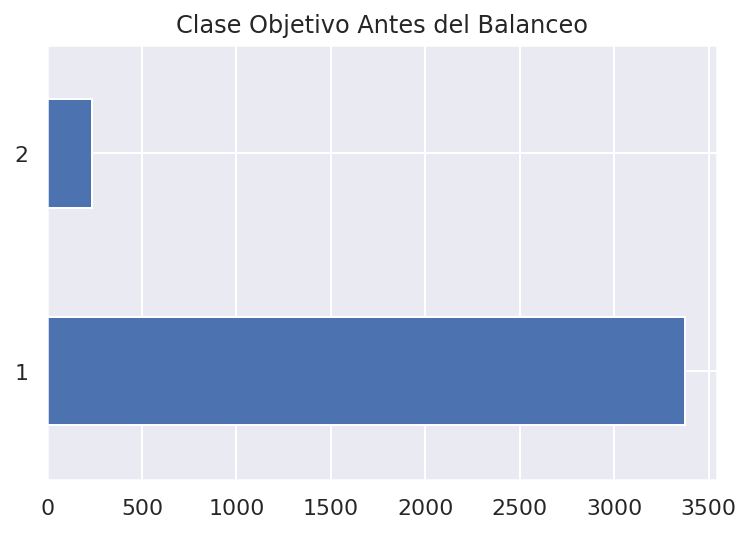

In [37]:
plot= y_train.value_counts().plot(kind='barh', title="Clase Objetivo Antes del Balanceo") 

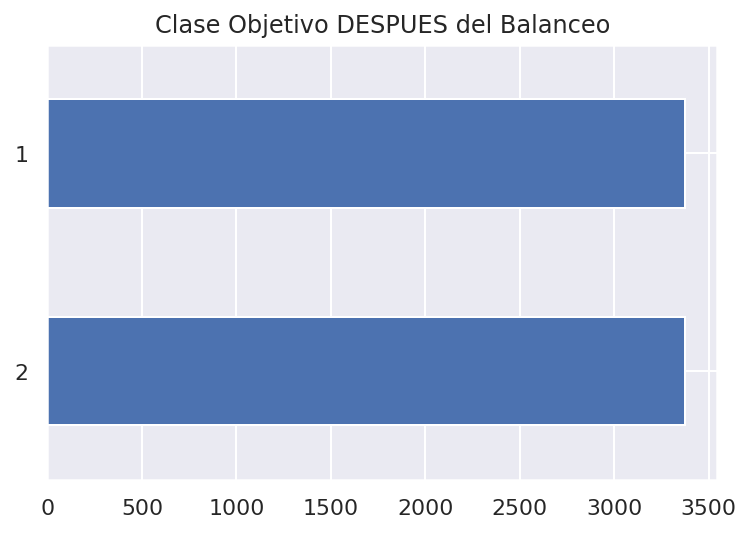

In [38]:
plot= y_train_balanced.value_counts().plot(kind='barh', title="Clase Objetivo DESPUES del Balanceo") 

# Seleccion de variables

## Boruta

In [39]:
X_train_for_boruta=np.matrix(X_train)
y_train_for_boruta=np.transpose(np.ravel(np.matrix(y_train), order='C'))

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [40]:
boruta_selector = boruta.BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 50, perc = 90)
boruta_selector.fit(X_train_for_boruta, np.ravel(y_train_for_boruta, order='C'))

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	11
Tentative: 	8
Rejected: 	20
Iteration: 	9 / 50
Confirmed: 	11
Tentative: 	8
Rejected: 	20
Iteration: 	10 / 50
Confirmed: 	11
Tentative: 	8
Rejected: 	20
Iteration: 	11 / 50
Confirmed: 	11
Tentative: 	8
Rejected: 	20
Iteration: 	12 / 50
Confirmed: 	11
Tentative: 	8
Rejected: 	20
Iteration: 	13 / 50
Confirmed: 	11
Tentative: 	8
Rejected: 	20
Iteration: 	14 / 50
Confirmed: 	11
Tentative: 	8
Rejected: 	20
Iteration: 	15 / 50
Confirmed: 	11
Tentative: 	8
Rejected: 	20
Iteration: 	16 / 50
Confirmed: 	11
Tentative: 	7
Rejected: 	21
Iteratio

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=105, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F466C67F258,
                                          verbose=0, warm_start=

In [41]:
boruta_selector.ranking_

array([ 1,  9, 11, 10,  1,  1,  1, 21, 17,  1,  2, 19, 19,  1,  1, 27,  3,
        1,  8, 25, 15, 23,  1, 15,  4, 13,  7,  5,  1,  1, 26, 27, 24,  6,
       17, 21, 14, 29, 12])

In [42]:
print('Se han seleccionado ',boruta_selector.n_features_, ' variable del total de ',X_train_balanced.shape[1])

Se han seleccionado  11  variable del total de  39


In [43]:
features_boruta = list()
indexes = np.where(boruta_selector.support_ == True)
for x in np.nditer(indexes):
    features_boruta.append(X_train_balanced.columns.tolist()[x])
print(features_boruta)

['P0R1', 'P3', 'P7', 'P8', 'P15A', 'P22', 'P24', 'P29', 'P35', 'P38SP8', 'P38SP9']


In [44]:
SELECTION_PCA = "PCA"
SELECTION_BORUTA = "Boruta"
SELECTION_IN_COMMON ="InCommon"
executeMode = SELECTION_IN_COMMON

In [45]:
print('Comparamos los listados de features de los algoritmos de seleccion de variables: ')
print('PCA : ', features_pca)
print('Boruta : ', features_boruta)
features_in_common = sorted(set(features_pca).intersection(features_boruta))
print('Coinciden en los elementos: ',features_in_common)

Comparamos los listados de features de los algoritmos de seleccion de variables: 
PCA :  ['P38SP1', 'P39', 'DB1', 'P35', 'P7', 'P22', 'DB0', 'POB1', 'P22', 'DB0', 'P31', 'P46', 'P0R1', 'P18A', 'P38SP9']
Boruta :  ['P0R1', 'P3', 'P7', 'P8', 'P15A', 'P22', 'P24', 'P29', 'P35', 'P38SP8', 'P38SP9']
Coinciden en los elementos:  ['P0R1', 'P22', 'P35', 'P38SP9', 'P7']


## Clustering

In [48]:
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


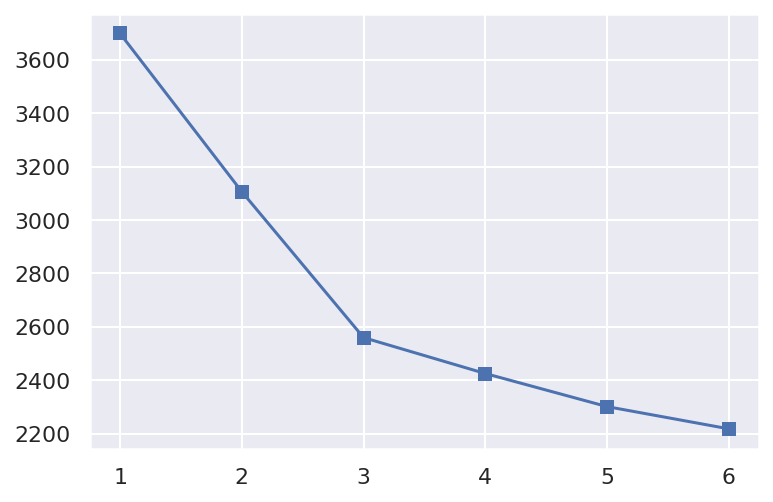

In [59]:
inertia = []
kmeansList = []
for k in tqdm(range(1, 6 + 1)):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=RANDOM_STATE, n_jobs=1).fit(df_without_correlations.drop('P23', axis=1))
    kmeansList.append(kmeans)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 7), inertia, marker='s');

In [69]:
kmeansSelected = kmeansList[4]
cluster_labels = kmeansSelected.labels_
tab = pd.crosstab(df_without_correlations["P23"], cluster_labels, margins=True)
tab.index = ['Clase1', 'Clase2', ]
tab.head()

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [52]:
d = {}
for k in range(2, 6):
    i = k - 1
    d[k] = (inertia[i] - inertia[i + 1]) / (inertia[i - 1] - inertia[i])

In [53]:
inertia

[3103.5093661029578,
 2594.8901878811494,
 2144.987123792626,
 2028.745539339134,
 1931.52532003077,
 1853.0281965716024]

# Entrenamiento y Evaluación de Modelos

## Regresión Logística

In [ ]:
def mostrar_resultados(y_test, pred_y, title):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title(title)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
    
#     Modelos de Regresión Lineal
def run_Logistic_Regression_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base


In [ ]:
if executeMode == SELECTION_BORUTA: 
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_boruta], X_test[features_boruta], y_train_balanced, y_test)   
elif executeMode == SELECTION_PCA:
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_pca], X_test[features_pca], y_train_balanced, y_test)   
elif executeMode == SELECTION_IN_COMMON:
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_in_common], X_test[features_in_common], y_train_balanced, y_test)   
else :
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced, X_test, y_train_balanced, y_test)

In [ ]:
if executeMode  == SELECTION_BORUTA:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos(Boruta) de Test")
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos(Boruta) de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos(Boruta) de Train Balanceados")
elif executeMode == SELECTION_PCA:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_pca]), "Matriz de Confusion de Regresion Logisitca con los datos(PCA) de Test")
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_pca]), "Matriz de Confusion de Regresion Logisitca con los datos(PCA) de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_pca]), "Matriz de Confusion de Regresion Logisitca con los datos(PCA) de Train Balanceados")
elif executeMode == SELECTION_IN_COMMON:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_in_common]), "Matriz de Confusion de Regresion Logisitca con los datos(In common) de Test")
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_in_common]), "Matriz de Confusion de Regresion Logisitca con los datos(In common) de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_in_common]), "Matriz de Confusion de Regresion Logisitca con los datos(In common) de Train Balanceados")   
else :
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test), "Matriz de Confusion de Regresion Logisitca con los datos de Test")  
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train), "Matriz de Confusion de Regresion Logisitca con los datos de Train original")
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced), "Matriz de Confusion de Regresion Logisitca con los datos de Train Balanceados")

## Random Forest

In [ ]:
### Random Forest Classifier ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):
    
    # fitting model with input max_leaf_nodes
    model = RandomForestClassifier(n_estimators=num_est, random_state=0,  bootstrap = True,verbose=1,
                               max_features = 'sqrt')

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [ ]:
plot_mae = {}
for num_est  in range(2,50):
    if executeMode == SELECTION_BORUTA:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_boruta],X_test[features_boruta],y_train_balanced,y_test)
    elif executeMode == SELECTION_PCA:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_pca],X_test[features_pca],y_train_balanced,y_test)
    elif executeMode == SELECTION_IN_COMMON:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_in_common],X_test[features_in_common],y_train_balanced,y_test)
    else: 
      my_mae = get_mae_rf(num_est,X_train_balanced,X_test,y_train_balanced,y_test)
    plot_mae[num_est] = my_mae

In [ ]:
plot_mae = {}
for num_est  in range(2,50):
    my_mae = get_mae_rf(num_est,X_train_balanced,X_test,y_train_balanced,y_test)
    plot_mae[num_est] = my_mae

In [ ]:
plt.plot(list(plot_mae.keys()),list(plot_mae.values()))
plt.show()

In [ ]:
 # fitting model with input max_leaf_nodes
model_forest_classifier = RandomForestClassifier(n_estimators=10, random_state=0,  bootstrap = True,verbose=2, max_features = 'sqrt')

# fitting the model with training dataset
if executeMode  == SELECTION_BORUTA:
  model_forest_classifier.fit(X_train_balanced[features_boruta], y_train_balanced)
elif executeMode == SELECTION_PCA:
  model_forest_classifier.fit(X_train_balanced[features_pca], y_train_balanced)
elif executeMode == SELECTION_IN_COMMON:
  model_forest_classifier.fit(X_train_balanced[features_in_common], y_train_balanced)
else :
  model_forest_classifier.fit(X_train_balanced, y_train_balanced)

In [ ]:
if executeMode  == SELECTION_BORUTA:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_boruta]), "Random Forest con los datos(Boruta) de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_boruta]), "Random Forest con los datos(Boruta) de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_boruta]), "Random Forest con los datos(Boruta) de Train originales")
elif executeMode == SELECTION_PCA:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_pca]), "Random Forest con los datos(PCA) de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_pca]), "Random Forest con los datos(PCA) de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_pca]), "Random Forest con los datos(Pca) de Train originales")
elif executeMode == SELECTION_IN_COMMON:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_in_common]), "Random Forest con los datos(In common) de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_in_common]), "Random Forest con los datos(In common) de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_in_common]), "Random Forest con los datos(In common) de Train originales")    
else :
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test), "Random Forest con los datos de Test")
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced), "Random Forest con los datos de Train Balanceados")
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train), "Random Forest con los datos de Train originales")